# Phase d'exploration des données apres transfo 1

In [33]:
import pandas as pd, numpy as np, calendar as cal, datetime as dt, matplotlib.pyplot as plt, seaborn as sns

In [32]:
print ("Librairie utilisees : ")
print ("- pandas version " , pd.__version__)
print ("- numpy version ", np.__version__)
print ("- matplotlib, pyplot")
print ("- calendar  ")
print ("- datetime ")
print ("- seaborn ")

Librairie utilisees : 
- pandas version  0.20.3
- numpy version  1.13.3
- matplotlib, pyplot
- calendar  
- datetime 
- seaborn 


In [3]:
df = pd.read_table("DATA/OLD/positionshistoriqueW.csv",sep =';',header = 0, parse_dates=[0,1])

In [4]:
df.shape

(162120, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162120 entries, 0 to 162119
Data columns (total 18 columns):
DateReception_HeureReception    162120 non-null datetime64[ns]
DateGPS_HeureGPS                162120 non-null datetime64[ns]
idBalise                        162120 non-null int64
Longitude                       162120 non-null float64
Latitude                        162120 non-null float64
Vitesse                         162120 non-null int64
Direction                       162120 non-null int64
Altitude                        162120 non-null int64
Satellites                      162120 non-null int64
MessageId                       162120 non-null int64
Puissance                       162120 non-null float64
VoltageBatterie                 162120 non-null float64
Distance                        162120 non-null int64
DayWeekGPS                      162120 non-null int64
DayWeekRec                      162120 non-null int64
NumDateGPS                      162120 non-null int64

<h3>Analyse par balises des dates de relevés</h3>

In [6]:
df2=df[['idBalise','DayWeekGPS', 'DateGPS_HeureGPS']]

In [7]:
df2.groupby(['idBalise']).describe().to_csv('DATA/describe_groupby_idBalise.csv', sep = ';',index = True)

>Echantillonage du jeu de données initial


- Limitation du jeu de données aux balises qui semblent encore actives
 * Dernière date de réception en 2018 > on garde
 * Dernière date de réception antérieure à 2018 > on ne garde pas
- Limitation en profondeur d'historique (à étudier
 * Eviter les valeurs abérrantes du démarrage qui sont des phénomènes liés à des problèmes techniques indentifiés corrigés
 * Limitation de l'analyse de l'historique des balises à environ 12 mois : du 31.1.2017 au 31.1.2018
 * Limitation de certaines analyse au 2 derniers mois de relevés

---
Analyse sur excel des dates min max par balise :
- Résultat :
 * Liste de balises réduite à 23 balises
 * 10002, 10004, 10006, 10008, 10009, 10010, 10011, 11002, 11003, 11004, 11005, 11007, 11008, 12001, 12002, 12003, 12004, 12005, 12006, 12007, 12008, 12009, 12010

- Aucune valeurs manquantes
- L'altitude semble mal calibré. Vérifier la véracité de la valeur à l'aide de données externes 
    * srtm.py : pour récupérer facilement les altitudes des traces GPS
- Moyennes Latitude et Longitude permettent de déterminer un centre de la zone de chalandise de chaque balise
- L'écart type des longitudes et latitudes permettent de voir la dispersion autour de ces moyennes
    * La dispersion est trés faible pour la plupart des balises
    * La balise qui présente la plus grande dispersion est la N°10008
>Graphique pour visualiser la répartition du nombre d'observation toutes balises confondues sur les jours de la semaine

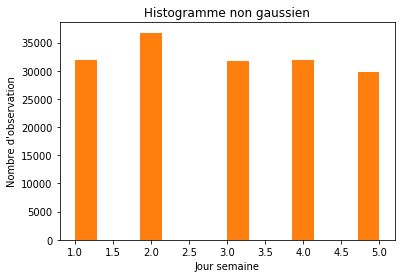

In [9]:
plt.hist(df2['DayWeekGPS'], bins=14, histtype='bar')
plt.savefig('IMG/Hist_DayWeekGPS.png')
plt.title("Histogramme non gaussien")
plt.xlabel("Jour semaine")
plt.ylabel("Nombre d\'observation")
plt.legend()
plt.show()

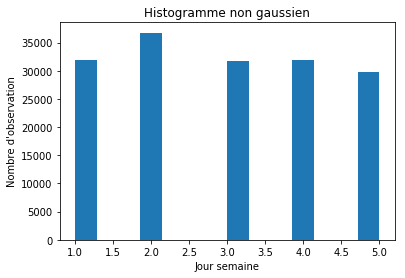

In [10]:
plt.hist(df['DayWeekGPS'], bins=14, histtype='bar')
plt.savefig('IMG/Hist_DayWeekGPS.png')
plt.title("Histogramme non gaussien")
plt.xlabel("Jour semaine")
plt.ylabel("Nombre d\'observation")
plt.legend()
plt.show()

- - -
> **Description** :
- Les observations sont plus nombreuses toutes balises confondues les jours ouvrés (Lun - vend)
- Quelques observations de plus le samedi par rapport au dimanche
- - -
> **Exploration** :
<p>
- Etude du comportenment des balises en semaine (du lundi au vendredi)
<ul>
- Principaux points d'intérêts ?
- Irrégularités du délai de transmission des positions GPS ?
</ul>
</p>
<p>
- Etude du comportement des balises le week-end (samedi et dimanche)
<ul>
- Données manquantes ?
- Irrégularités du délai de transmission des positions GPS ?
</ul>
</p>
- - -

In [28]:
df_by_jour_mean = df.groupby('DayWeekGPS').mean()
df_by_jour_mean_delai=df_by_balise_mean['DelaiTransmission']

In [20]:
df_by_balise_mean = df.groupby('idBalise').mean()
df_by_balise_mean_delai=df_by_balise_mean['DelaiTransmission']

In [17]:
print ('Delai max de reception : ' ,df.DelaiTransmission.max())
print ('Delai min de reception : ' ,df.DelaiTransmission.min())
print ('NB Delai  de reception : ' ,df.DelaiTransmission.count())
print ('Moyenne Delai  de reception : ' ,df.DelaiTransmission.mean())
print ('Ecart-Type  de reception : ' ,df.DelaiTransmission.std())

Delai max de reception :  452218
Delai min de reception :  0
NB Delai  de reception :  162120
Moyenne Delai  de reception :  1338.6146866518627
Ecart-Type  de reception :  13702.322449453673


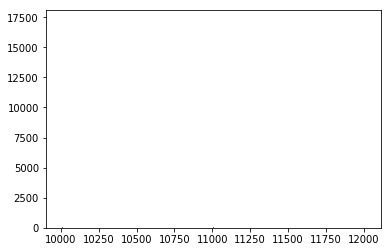

In [29]:
plt.bar(df_by_jour_mean_delai.index,df_by_jour_mean_delai.values)
plt.show()

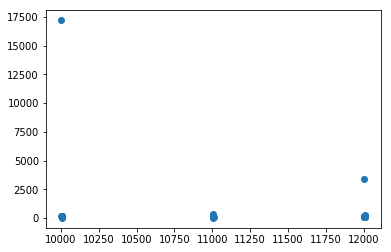

In [30]:
plt.scatter(df_by_balise_mean_delai.index,df_by_balise_mean_delai.values)
plt.show()

In [23]:
df.describe(include='all')

,DateReception_HeureReception,DateGPS_HeureGPS,idBalise,Longitude,Latitude,Vitesse,Direction,Altitude,Satellites,MessageId,Puissance,VoltageBatterie,Distance,DayWeekGPS,DayWeekRec,NumDateGPS,NumDateRec,DelaiTransmission
count,162120,162120,162120.00000,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000,162120.000000,1.621200e+05,162120.000000,162120.000000,1.621200e+05,1.621200e+05,162120.000000
unique,148765,147607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-15 10:18:28,2018-01-22 07:08:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2018-01-01 00:48:25,2018-01-01 00:48:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-01-31 00:36:52,2018-01-30 23:52:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11116.88131,5.976990,43.441010,45.847773,184.099704,86.211528,8.051616,42.891019,14.145452,4.073619,3.770193e+07,2.945343,2.953479,1.290025e+06,1.288686e+06,1338.614687
std,NaN,NaN,848.08264,0.791660,0.184282,31.756538,103.365870,82.474692,2.072746,126.115207,0.629111,0.045960,2.658348e+07,1.392976,1.387915,7.294272e+05,7.285876e+05,13702.322449
min,NaN,NaN,10002.00000,4.788184,43.079895,0.000000,0.000000,-338.000000,0.000000,2.000000,11.360000,3.968000,1.524428e+06,1.000000,1.000000,4.320000e+02,-2.212000e+03,0.000000
25%,NaN,NaN,10010.00000,5.399409,43.287693,22.000000,93.000000,27.000000,7.000000,2.000000,14.064000,4.048000,1.867957e+07,2.000000,2.000000,6.476060e+05,6.474208e+05,0.000000


In [24]:
sub0=df[df['Distance'] == 0]
sub0

,DateReception_HeureReception,DateGPS_HeureGPS,idBalise,Longitude,Latitude,Vitesse,Direction,Altitude,Satellites,MessageId,Puissance,VoltageBatterie,Distance,DayWeekGPS,DayWeekRec,NumDateGPS,NumDateRec,DelaiTransmission


In [25]:
df_elapse_time_neg=df[df['DelaiTransmission'] < 0]
df_elapse_time_neg

,DateReception_HeureReception,DateGPS_HeureGPS,idBalise,Longitude,Latitude,Vitesse,Direction,Altitude,Satellites,MessageId,Puissance,VoltageBatterie,Distance,DayWeekGPS,DayWeekRec,NumDateGPS,NumDateRec,DelaiTransmission


In [26]:
df_elapse_time_sup_60=df[df['DelaiTransmission'] >60]
df_elapse_time_sup_60

,DateReception_HeureReception,DateGPS_HeureGPS,idBalise,Longitude,Latitude,Vitesse,Direction,Altitude,Satellites,MessageId,Puissance,VoltageBatterie,Distance,DayWeekGPS,DayWeekRec,NumDateGPS,NumDateRec,DelaiTransmission
1,2018-01-17 00:00:33,2018-01-16 23:59:13,12010,5.387159,43.288093,18,322,28,0,194,12.720,4.048,18072949,2,3,1209647,1209567,80
6,2018-01-22 00:05:42,2018-01-22 00:04:22,12010,5.387600,43.288085,0,251,5,0,194,12.720,4.128,18253323,1,1,777338,777258,80
7,2018-01-17 00:06:06,2018-01-17 00:04:43,12008,5.442409,43.303115,0,115,117,7,194,12.688,4.080,19800833,3,3,1209317,1209234,83
8,2018-01-18 00:06:24,2018-01-18 00:04:57,12008,5.442483,43.303100,0,325,91,0,194,12.624,4.144,19884133,4,4,1122903,1122816,87
9,2018-01-09 00:07:20,2018-01-09 00:05:56,12009,5.474818,43.286220,0,307,72,9,194,12.272,4.080,17975908,2,2,1900444,1900360,84
14,2018-01-04 00:08:49,2018-01-04 00:07:29,12010,5.387596,43.288021,4,320,32,0,194,12.736,4.111,17345584,4,4,2332351,2332271,80
16,2018-01-17 00:09:45,2018-01-17 00:08:22,12009,5.474544,43.286239,0,191,64,7,194,12.336,3.984,18291523,3,3,1209098,1209015,83
20,2018-01-10 00:11:24,2018-01-10 00:10:01,12009,5.474687,43.286254,0,96,74,0,194,12.272,4.000,18019152,3,3,1813799,1813716,83
21,2018-01-29 00:12:11,2018-01-29 00:11:06,12008,5.442311,43.303100,0,271,115,5,161,14.288,4.144,20612214,1,1,172134,172069,65
22,2018-01-29 00:12:14,2018-01-29 00:11:06,12008,5.442311,43.303100,0,271,115,5,500,14.288,4.144,20612214,1,1,172134,172066,68


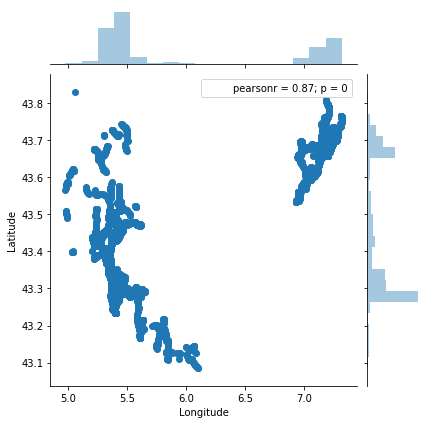

In [36]:
#seaborn.jointplot(x="Longitude", y="Latitude", data=df_elapse_time_neg)
#seaborn.jointplot(x="Longitude", y="Latitude", data=df_elapse_time_sup_60)
frames = [df_elapse_time_neg, df_elapse_time_sup_60]
result = pd.concat(frames)
sns.jointplot(x="Longitude", y="Latitude", data=result)
plt.show()

In [37]:
df3 = df.groupby(['idBalise','DayWeekGPS']).mean()
df3

Longitude   Latitude    Vitesse   Direction    Altitude  \
idBalise DayWeekGPS                                                            
10002    1            7.072006  43.615067  50.794368  169.935167   63.722331   
         2            7.064639  43.609664  49.422235  170.663672   63.983156   
         3            7.063225  43.610330  53.730627  177.326937   60.766790   
         4            7.055080  43.605386  54.604096  176.471672   58.551536   
         5            7.059207  43.615751  49.847569  177.791064   79.556505   
10004    1            7.227448  43.695468  36.571156  175.135148   42.698185   
         2            7.218846  43.687038  30.419263  174.203494   37.873466   
         3            7.227769  43.696495  36.891947  181.614169   44.228848   
         4            7.227124  43.697131  36.628613  175.792389   48.142582   
         5            7.217926  43.688152  28.848024  183.952584   41.870517   
10006    1            7.177257  43.709191  47.677022  195.228605   69.761430   
         2            7.181506  43.711365  47.408359  194.286896   65.876796   
         3            7.178737  43.709543  44.970868  199.326789   59.549715   
         4            7.181222  43.708652  46.902342  202.119360   60.498572   
         5            7.181992  43.717760  45.713301  199.279118   64.392143   
10008    1            7.167368  43.682788  48.459060  182.178523   41.856376   
         2            7.147329  43.670051  45.423529  182.352941   89.358824   
         3            7.156326  43.662282  48.255285  175.404878   48.591870   
         4            7.175001  43.695599  56.127152  183.962914   44.241060   
         5            7.121431  43.646363  43.880466  187.218659   50.239067   
10009    1            7.054482  43.652030  37.824645  179.278436  163.099526   
         2            7.040318  43.654607  36.392808  182.769686  176.740555   
         3            7.046956  43.650301  39.070700  185.367777  156.865398   
         4            7.051496  43.652182  34.688742  181.848786  155.798565   
         5            7.049512  43.651613  37.129383  181.272068  165.748489   
10010    1            7.140258  43.675304  42.275292  198.167240   57.164487   
         2            7.133440  43.667910  34.706393  197.666140   46.653512   
         3            7.156581  43.674555  38.364010  192.904684   33.394412   
         4            7.138182  43.675879  40.595294  198.452549   57.413333   
         5            7.131523  43.667386  36.219540  196.354023   43.397701   
...                        ...        ...        ...         ...         ...   
12005    1            5.381628  43.339057  47.198763  191.345708   76.716164   
         2            5.357166  43.342581  49.435259  192.935757   75.288347   
         3            5.431463  43.338746  50.749835  182.707044  105.094141   
         4            5.329434  43.355886  53.261960  190.918903   70.999417   
         5            5.430452  43.301351  34.384977  183.214789   68.095070   
12006    1            5.479469  43.286803  47.033773  177.888797   67.253707   
         2            5.423892  43.287867  34.757042  178.193075   50.220657   
         3            5.470504  43.289948  45.695719  174.379969   67.420489   
         4            5.465253  43.279084  42.579288  184.955340   56.086084   
         5            5.483088  43.287292  46.883152  180.056159   68.453804   
12007    1            5.420039  43.309898  28.222902  189.550699   79.097028   
         2            5.419865  43.310262  27.905054  193.150842   75.130934   
         3            5.420877  43.308301  28.379249  193.339893   76.152952   
         4            5.418324  43.307704  28.371864  199.711470   70.532258   
         5            5.419848  43.309300  27.096682  196.244550   75.043602   
12008    1            5.431593  43.297220  26.073716  182.827252   72.046910   
         2            5.450793  43.323851  37.446514  183.486151   88.993792   
         3           

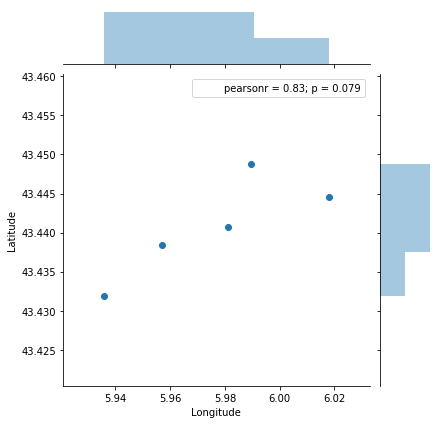

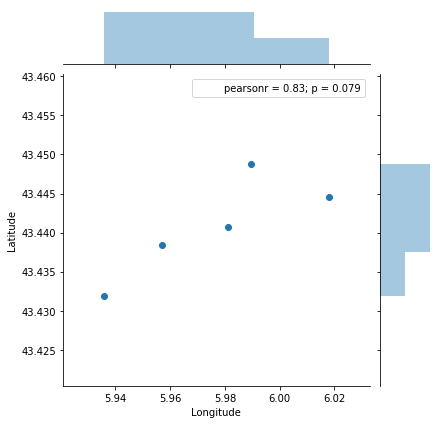

In [39]:
df4 = df.groupby('DayWeekGPS').mean()

sns.jointplot(x="Longitude", y="Latitude", data=df4)
plt.show()

In [40]:
df4

,idBalise,Longitude,Latitude,Vitesse,Direction,Altitude,Satellites,MessageId,Puissance,VoltageBatterie,Distance,DayWeekRec,NumDateGPS,NumDateRec,DelaiTransmission
DayWeekGPS,,,,,,,,,,,,,,,
1,11087.494060,5.989558,43.448799,46.007134,183.893362,80.826293,7.941228,42.453454,14.145017,4.073283,3.693411e+07,1.029229,1.028721e+06,1.025096e+06,3624.643661
2,11131.462535,5.981235,43.440770,44.064451,185.008356,85.054108,8.058817,43.044419,14.171076,4.073725,3.621616e+07,2.012085,1.267916e+06,1.266422e+06,1493.969843
3,11113.444748,5.956902,43.438464,48.079097,183.402748,90.255808,8.166871,41.628156,14.150865,4.074259,3.949483e+07,3.000063,1.471832e+06,1.471248e+06,583.974190
4,11115.436883,6.017974,43.444594,45.145961,185.704045,83.630049,8.062461,43.819401,14.140502,4.072142,3.713561e+07,4.000156,1.382714e+06,1.382578e+06,135.757534
5,11135.522376,5.935736,43.431847,46.248387,182.219258,91.849348,8.025904,43.521301,14.113823,4.074750,3.904933e+07,4.997917,1.302739e+06,1.301937e+06,802.281548


In [42]:
df_by_balise = df.groupby('idBalise')

In [43]:
df_by_balise.get_group(12005).head(3)

,DateReception_HeureReception,DateGPS_HeureGPS,idBalise,Longitude,Latitude,Vitesse,Direction,Altitude,Satellites,MessageId,Puissance,VoltageBatterie,Distance,DayWeekGPS,DayWeekRec,NumDateGPS,NumDateRec,DelaiTransmission
3998,2018-01-10 05:45:31,2018-01-10 05:45:29,12005,5.427400,43.270301,0,356,64,10,500,14.992,4.111,21652102,3,3,1793671,1793669,2
4100,2018-01-10 05:46:53,2018-01-10 05:46:53,12005,5.427308,43.271091,22,323,57,10,2,15.136,4.111,21652210,3,3,1793587,1793587,0
4142,2018-01-10 05:47:23,2018-01-10 05:47:23,12005,5.428083,43.271987,23,61,52,9,2,14.704,4.111,21652362,3,3,1793557,1793557,0


In [47]:
desc_df_by_balise=df_by_balise.describe()

desc_df_by_balise


Altitude                                                              \
            count        mean         std    min    25%    50%     75%    max   
idBalise                                                                        
10002      7650.0   65.419608   67.179782  -27.0   14.0   33.0  110.00  581.0   
10004      9895.0   42.973623   41.906156  -66.0   18.0   29.0   49.00  313.0   
10006      8784.0   64.176571   73.995916  -49.0   18.0   32.0   83.00  326.0   
10008      2968.0   52.989892   58.088469  -59.0   16.0   29.0   76.00  342.0   
10009      8822.0  164.454205  144.942509 -240.0   44.0  131.0  248.00  665.0   
10010      6082.0   48.301381   52.429178  -21.0   16.0   32.0   67.00  349.0   
10011      6166.0   62.524165   82.698987 -104.0   16.0   29.0   80.00  582.0   
11002      9620.0   68.823493   63.466714  -36.0   23.0   52.0   94.00  360.0   
11003      4496.0  148.476423   77.102202   -2.0  105.0  131.0  193.25  419.0   
11004      1850.0  110.916757   75.372008  -13.0   56.0  107.0  137.00  358.0   
11005      7044.0   76.624645   45.836351 -138.0   38.0   78.0  107.00  243.0   
11007      8801.0  107.244972  106.523182  -22.0   23.0   65.0  169.00  475.0   
11008     11571.0  203.887650   77.750862    0.0  158.0  197.0  252.00  440.0   
12001      7714.0   88.247602   65.453252  -26.0   39.0   65.0  131.00  258.0   
12002      6012.0   66.024617   63.503067  -67.0   21.0   48.0   86.00  320.0   
12003      5089.0   69.558852   39.882992 -338.0   35.0   69.0   96.00  186.0   
12004      8196.0   69.683626   48.221654  -38.0   34.0   67.0   81.00  330.0   
12005      7386.0   79.843082   48.911860   -6.0   48.0   64.0  100.00  287.0   
12006      6875.0   60.746764   35.889131 -133.0   28.0   64.0   85.00  157.0   
12007      5739.0   75.210315   43.852312  -38.0   37.0   74.0  108.00  209.0   
12008      8715.0   83.870453   60.718775  -81.0   40.0   72.0  111.00  446.0   
12009      6409.0   44.518490   32.232322  -33.0   17.0   40.0   67.00  173.0   
12010      6236.0   58.398012   53.464562 -319.0   24.0   48.0   76.00  444.0   

         DayWeekGPS            ...   Vitesse        VoltageBatterie            \
              count      mean  ...       75%    max           count      mean   
idBalise                       ...                                              
10002        7650.0  2.957386  ...      82.0  128.0          7650.0  4.026920   
10004        9895.0  2.905003  ...      51.0  131.0          9895.0  4.133770   
10006        8784.0  2.879781  ...      62.0  136.0          8784.0  4.044923   
10008        2968.0  2.811658  ...      70.0  125.0          2968.0  4.087605   
10009        8822.0  2.948651  ...      49.0  118.0          8822.0  4.102327   
10010        6082.0  2.809602  ...      49.0  109.0          6082.0  4.087381   
10011        6166.0  2.948913  ...      59.0  130.0          6166.0  4.093469   
11002        9620.0  2.817568  ...      84.0  124.0          9620.0  4.131825   
11003        4496.0  3.058719  ...      82.0  144.0          4496.0  4.054794   
11004        1850.0  2.427027  ...      80.0  123.0          1850.0  4.033747   
11005        7044.0  2.897076  ...      68.0  130.0          7044.0  4.069597   
11007        8801.0  3.240086  ...      59.0  123.0          8801.0  4.106811   
11008       11571.0  3.044767  ...      92.0  139.0         11571.0  4.011839   
12001        7714.0  2.983925  ...      84.0  145.0          7714.0  4.088614   
12002        6012.0  2.863772  ...      84.0  150.0          6012.0  4.032777   
12003        5089.0  2.963844  ...      59.0  110.0          5089.0  4.035043   
12004        8196.0  2.816374  ...      72.0  154.0          8196.0  4.052421   
12005        7386.0  2.840780  ...      70.0  124.0          7386.0  4.067092   
12006        6875.0  2.944873  ...      63.0  109.0          6875.0  4.069077   
12007        5739.0  2.935877  ...      42.0   93.0          5739.0  4.074414   
12008        8715.0  3.112565  ...     

In [45]:
desc_df_by_balise['Latitude']

,count,mean,std,min,25%,50%,75%,max
idBalise,,,,,,,,
10002,7650.0,43.611252,0.044221,43.527450,43.574974,43.612848,43.654659,43.695884
10004,9895.0,43.693000,0.025635,43.659091,43.669128,43.688808,43.709699,43.764247
10006,8784.0,43.711131,0.047058,43.656188,43.666930,43.697162,43.755211,43.812068
10008,2968.0,43.675399,0.044928,43.601692,43.659016,43.666581,43.689559,43.809604
10009,8822.0,43.652337,0.029262,43.581542,43.623680,43.659843,43.676461,43.698421
10010,6082.0,43.672602,0.021138,43.636856,43.658897,43.668663,43.684070,43.747802
10011,6166.0,43.658709,0.041214,43.539390,43.646484,43.665506,43.673007,43.809288
11002,9620.0,43.417689,0.099905,43.281845,43.325119,43.411181,43.493710,43.647617
11003,4496.0,43.360916,0.137082,43.108371,43.285543,43.298425,43.481223,43.831348


In [48]:
tab_balise_index=desc_df_by_balise['Latitude'].index
tab_balise_index

Int64Index([10002, 10004, 10006, 10008, 10009, 10010, 10011, 11002, 11003,
            11004, 11005, 11007, 11008, 12001, 12002, 12003, 12004, 12005,
            12006, 12007, 12008, 12009, 12010],
           dtype='int64', name='idBalise')

In [49]:
tab_latitude_mean=desc_df_by_balise['Latitude'].values[:,1]
tab_latitude_mean

array([ 43.61125219,  43.69299993,  43.71113092,  43.67539949,
        43.6523366 ,  43.67260173,  43.65870923,  43.41768893,
        43.36091579,  43.3670584 ,  43.30780708,  43.17473343,
        43.57041341,  43.36426897,  43.2491026 ,  43.29799549,
        43.31454242,  43.33950703,  43.28600897,  43.30913331,
        43.3182253 ,  43.29830818,  43.29558309])

In [50]:
tab_longitude_mean=desc_df_by_balise['Longitude'].values[:,1]
tab_longitude_mean

array([ 7.0629478 ,  7.22401968,  7.18020679,  7.1582697 ,  7.04815443,
        7.14041895,  7.12834422,  5.25465449,  5.55777869,  5.4387816 ,
        5.44921663,  5.85205431,  5.43219112,  5.38940795,  5.50349722,
        5.45971525,  5.42347921,  5.37874662,  5.46137478,  5.41979393,
        5.44348886,  5.41004075,  5.43109611])

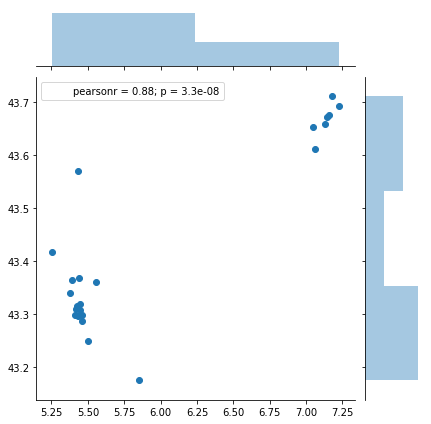

In [51]:
#plt.scatter(tab_longitude_mean,tab_latitude_mean,color='k',s=50)
sns.jointplot(tab_longitude_mean, tab_latitude_mean)
#plt.grid()
#plt.ylabel('Latitude')
#plt.xlabel('Longitude')
#plt.title('Nuage de points')
#plt.savefig('Nuage2.png')
plt.show()

In [52]:
nb_balise=df['idBalise'].value_counts(sort=True)
nb_balise

11008    11571
10004     9895
11002     9620
10009     8822
11007     8801
10006     8784
12008     8715
12004     8196
12001     7714
10002     7650
12005     7386
11005     7044
12006     6875
12009     6409
12010     6236
10011     6166
10010     6082
12002     6012
12007     5739
12003     5089
11003     4496
10008     2968
11004     1850
Name: idBalise, dtype: int64

In [53]:
np_array_balise=nb_balise.index 
np_array_balise


Int64Index([11008, 10004, 11002, 10009, 11007, 10006, 12008, 12004, 12001,
            10002, 12005, 11005, 12006, 12009, 12010, 10011, 10010, 12002,
            12007, 12003, 11003, 10008, 11004],
           dtype='int64')

In [54]:
np_array_nb_obs=nb_balise.values 
np_array_nb_obs

array([11571,  9895,  9620,  8822,  8801,  8784,  8715,  8196,  7714,
        7650,  7386,  7044,  6875,  6409,  6236,  6166,  6082,  6012,
        5739,  5089,  4496,  2968,  1850])

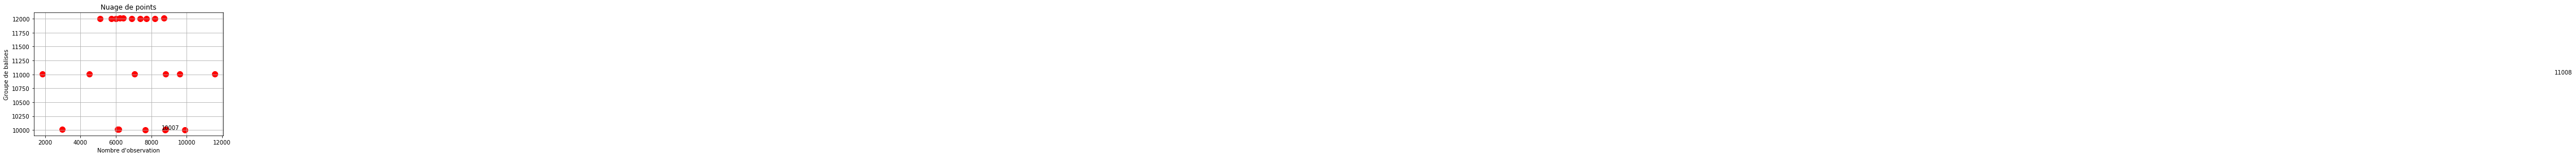

In [56]:
plt.scatter(np_array_nb_obs,np_array_balise,color='r',s=100)

plt.text(143793, 11008, '11008', fontsize=10)
plt.text(8582, 10007, '10007', fontsize=10)
plt.grid()
plt.ylabel('Groupe de balises')
plt.xlabel('Nombre d\'observation')
plt.title('Nuage de points')
plt.savefig('Nuage1.png')
plt.show()